In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/derrickgzq/germancreditdata/main/german_credit_data%20(1).csv')
df = df.drop(columns = ['Unnamed: 0'], axis = 1)

columns details:

Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

Risk (Value target - Good or Bad Risk)

# Analysis

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())
  print('')

In [4]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [6]:
imputer = SimpleImputer(strategy = 'most_frequent')
df[['Saving accounts','Checking account']] = imputer.fit_transform(df[['Saving accounts','Checking account']])

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


# Visualization

Text(0.5, 1.0, 'Credit amount distribution')

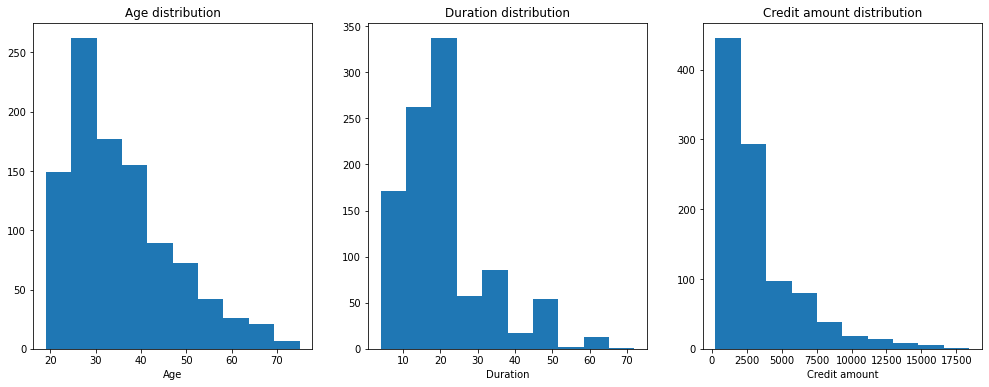

In [8]:
fig, ax = plt.subplots(1,3, figsize = (17,6))
ax[0].hist(df['Age'])
ax[0].set_xlabel('Age')
ax[0].set_title('Age distribution')
ax[1].hist(df['Duration'])
ax[1].set_xlabel('Duration')
ax[1].set_title('Duration distribution')
ax[2].hist(df['Credit amount'])
ax[2].set_xlabel('Credit amount')
ax[2].set_title('Credit amount distribution')


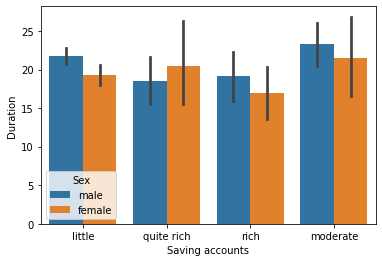

In [9]:
sns.barplot(data = df, x = df['Saving accounts'], y = df['Duration'], hue = 'Sex')

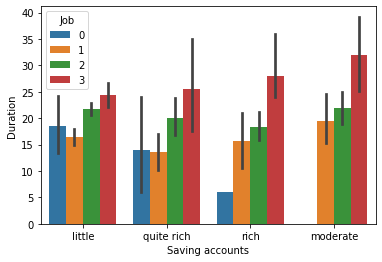

In [10]:
sns.barplot(data = df, x = df['Saving accounts'], y = df['Duration'], hue = 'Job')

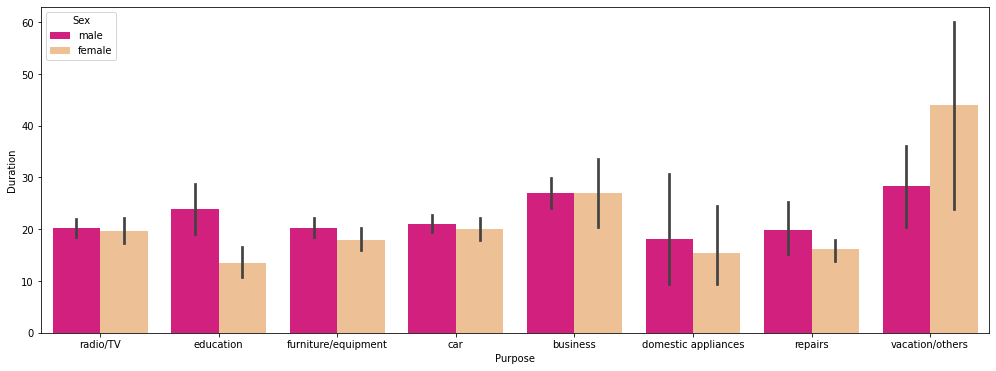

In [11]:
fig = plt.subplots(figsize = (17,6))
sns.barplot(data = df, x = df['Purpose'], y = df['Duration'], hue = 'Sex', palette = 'Accent_r')

Text(0.5, 0, 'Duration')

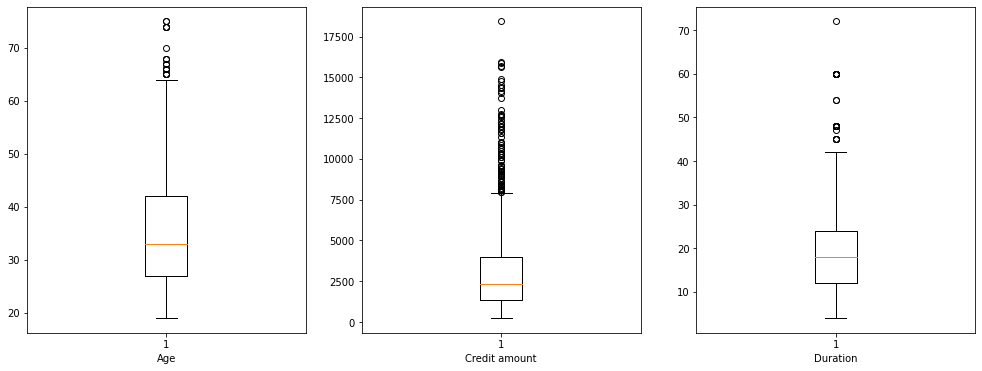

In [12]:
fig,ax = plt.subplots(1,3, figsize = (17,6))
ax[0].boxplot(df['Age'])
ax[0].set_xlabel('Age')
ax[1].boxplot(df['Credit amount'])
ax[1].set_xlabel('Credit amount')
ax[2].boxplot(df['Duration'])
ax[2].set_xlabel('Duration')


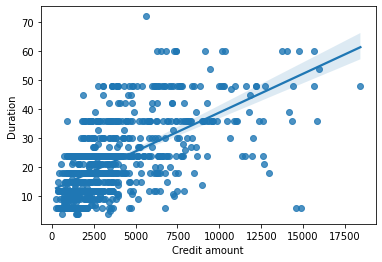

In [13]:
sns.regplot(data = df, y = df['Duration'], x = df['Credit amount'])

Thus, we can see that the higher the credit amount of a loan, the higher its duration.

In [14]:
corr = df[['Credit amount','Duration']].corr()
corr

,Credit amount,Duration
Credit amount,1.000000,0.624984
Duration,0.624984,1.000000


0.624984 signifies a positive relationship

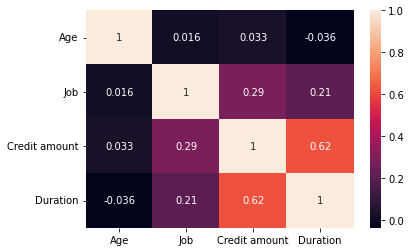

In [15]:
df_corr = df.corr()
sns.heatmap(df_corr, annot = True)

We can see that credit amount and duration has the strongest positive correlation. Meaning that when a person credits for a higher amount, the loan duration will be higher.

# Clustering

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [17]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [18]:
scaler  = MinMaxScaler()
scale = scaler.fit_transform(df[['Age','Job','Credit amount','Duration']])
df_scale = pd.DataFrame(scale, columns = ['Age','Job','Credit amount','Duration'])
df_scale.head(5)

,Age,Job,Credit amount,Duration
0,0.857143,0.666667,0.050567,0.029412
1,0.053571,0.666667,0.313690,0.647059
2,0.535714,0.333333,0.101574,0.117647
3,0.464286,0.666667,0.419941,0.558824
4,0.607143,0.666667,0.254209,0.294118


Scalling is to make the values are squeeze betwwn 0 to 1, enhance the model to manage them

In [19]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(df_scale)
pca_df = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])

In [20]:
pca_df.head()

,principal component 1,principal component 2
0,-0.128183,0.584940
1,0.285502,-0.283953
2,-0.312635,0.235845
3,0.296980,0.131427
4,0.091990,0.304725


PCA makes the dataset from multi dim to 2 dim, easy to show in a 2d chart 

In [21]:
K = range(2,25)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters = k)
    kmeans = kmeans.fit(pca_df)
    wss_iter = kmeans.inertia_
    print('k:',k,'wss:',wss_iter)
    wss.append(wss_iter)

k: 2 wss: 64.41683412914969
k: 3 wss: 42.26911467208885
k: 4 wss: 31.878685799848526
k: 5 wss: 27.031024517539926
k: 6 wss: 22.961215748151965
k: 7 wss: 19.533246613451183
k: 8 wss: 17.211113692080396
k: 9 wss: 15.338924869784048
k: 10 wss: 13.908307329002902
k: 11 wss: 11.972687901468264
k: 12 wss: 10.990246146137185
k: 13 wss: 10.17994179898368
k: 14 wss: 9.475996879129301
k: 15 wss: 9.037199528906047
k: 16 wss: 8.229195057100583
k: 17 wss: 7.847713032347414
k: 18 wss: 7.3280006812999385
k: 19 wss: 6.8242388247255565
k: 20 wss: 6.63373969451589
k: 21 wss: 6.241286145304205
k: 22 wss: 5.792434656665236
k: 23 wss: 5.556411411935697
k: 24 wss: 5.397991537065412


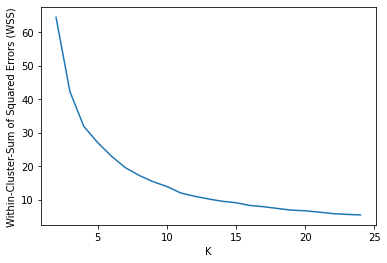

In [22]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [23]:
for i in range(2,25):
  labels = cluster.KMeans(n_clusters=i,random_state=200).fit(df_scale).labels_
  print ("Silhouette score for k(clusters) = "+str(i)+" is "
  +str(metrics.silhouette_score(df_scale,labels,metric = "euclidean",sample_size = 1000,random_state = 200)))

Silhouette score for k(clusters) = 2 is 0.29451560572792335
Silhouette score for k(clusters) = 3 is 0.3154005364281776
Silhouette score for k(clusters) = 4 is 0.3394929615284149
Silhouette score for k(clusters) = 5 is 0.3555282279847835
Silhouette score for k(clusters) = 6 is 0.35513915437922744
Silhouette score for k(clusters) = 7 is 0.3615732640285162
Silhouette score for k(clusters) = 8 is 0.29766479160342546
Silhouette score for k(clusters) = 9 is 0.29828166873850415
Silhouette score for k(clusters) = 10 is 0.29676994878904894
Silhouette score for k(clusters) = 11 is 0.30121782521758694
Silhouette score for k(clusters) = 12 is 0.29990428905082706
Silhouette score for k(clusters) = 13 is 0.30677612558462986
Silhouette score for k(clusters) = 14 is 0.2930610838594678
Silhouette score for k(clusters) = 15 is 0.299211194896896
Silhouette score for k(clusters) = 16 is 0.2850524373879008
Silhouette score for k(clusters) = 17 is 0.2980702811381412
Silhouette score for k(clusters) = 18 is 

k = 7 is the optimum

In [24]:
kmeans = cluster.KMeans(n_clusters = 7)
kmeans = kmeans.fit(pca_df)

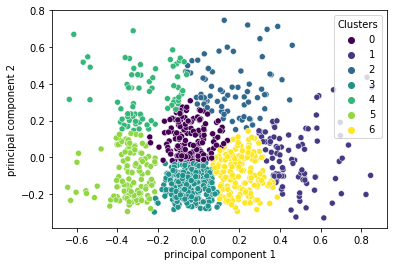

In [25]:
pca_df['Clusters'] = kmeans.labels_
ax = sns.scatterplot(x = "principal component 1", y = "principal component 2", hue = 'Clusters',  data = pca_df, palette = 'viridis')
plt.show()

In [27]:
#just a look through of over 2 dim dataset
pca_df.head()

,principal component 1,principal component 2,Clusters
0,-0.128183,0.584940,4
1,0.285502,-0.283953,6
2,-0.312635,0.235845,4
3,0.296980,0.131427,1
4,0.091990,0.304725,2


In [29]:
df_cluster = pd.concat([df['Age'],df['Credit amount'],df['Duration'],pca_df['Clusters']],axis = 1)

In [30]:
df_cluster

,Age,Credit amount,Duration,Clusters
0,67,1169,6,4
1,22,5951,48,6
2,49,2096,12,4
3,45,7882,42,1
4,53,4870,24,2
...,...,...,...,...
995,31,1736,12,5
996,40,3857,30,1
997,38,804,12,0
998,23,1845,45,6


3D Scatter plot

In [33]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(df_cluster.Clusters.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = df_cluster[df_cluster.Clusters == C]['Credit amount'],
                                y = df_cluster[df_cluster.Clusters == C]['Age'],
                                z = df_cluster[df_cluster.Clusters == C]['Duration'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis = dict(title = 'Credit amount', titlefont_color = 'black'),
                                yaxis = dict(title = 'Age', titlefont_color = 'black'),
                                zaxis = dict(title = 'Duration', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

# Modelling

In [34]:
# a look through again on our original dataset
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [36]:
#picking some features which are important in determining a person's risk
data = pd.concat([df['Job'],df['Housing'],df['Saving accounts'],df['Credit amount'],df['Duration'],], axis = 1)
data

,Job,Housing,Saving accounts,Credit amount,Duration
0,2,own,little,1169,6
1,2,own,little,5951,48
2,1,own,little,2096,12
3,2,free,little,7882,42
4,2,free,little,4870,24
...,...,...,...,...,...
995,1,own,little,1736,12
996,3,own,little,3857,30
997,2,own,little,804,12
998,2,free,little,1845,45


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics

In [38]:
le = preprocessing.LabelEncoder()

In [39]:
label = df['Risk']

In [40]:
X = data
X['Housing'] = le.fit_transform(df['Housing'].values)
X['Saving accounts'] = le.fit_transform(df['Saving accounts'].values)
#X['Purpose'] = le.fit_transform(df['Purpose'].values)

In [41]:
y = le.fit_transform(label)

In [42]:
X = X.rename(columns = {'Saving accounts':'Savings','Credit amount':'Credit_amount'},)

In [43]:
X.head()

,Job,Housing,Savings,Credit_amount,Duration
0,2,1,0,1169,6
1,2,1,0,5951,48
2,1,1,0,2096,12
3,2,0,0,7882,42
4,2,0,0,4870,24


For housing column, 1 - own, 2 - rent, 3 - free

For Saving Accounts column, 0 - little, 1 - moderate, 2 - quite rich, 3 - rich

For purpose column, business - 0, car - 1, dom - 2, edu - 3, furniture - 4, radio - 5, rep - 6, vac - 7

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 

Determine the best number for n_neighbors

In [45]:
maxk = 0
maxscore = 0
for x in range(1,100):
  mod = KNeighborsClassifier(n_neighbors = x)
  mod = mod.fit(X_train, y_train)
  predss = mod.predict(X_test)
  score = metrics.accuracy_score(y_test, predss)
  if score > maxscore:
    maxk = x
    maxscore = score

print(maxk)
print(maxscore)

57
0.72


In [46]:
params = {
    'n_neighbors':  range(1, 15, 2),
    'p': [1,2],
    'weights': ['uniform', 'distance']
}

clf = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}


In [47]:
knn = KNeighborsClassifier(n_neighbors = maxk)
knn_model = knn.fit(X_train, y_train)

In [48]:
y_pred = knn_model.predict(X_test)

Model diagnostics

In [49]:
metrics.accuracy_score(y_test, y_pred)

0.72

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [51]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Mean square error: ',mean_squared_error(y_test, y_pred))

[[  4  82]
 [  2 212]]
Accuracy: 0.72
Mean square error:  0.28


Usage

columns details:

Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

Risk (Value target - Good - 1 or Bad - 0)

In [54]:
input = pd.DataFrame({'Job' : [3, 2, 3],  
                      'Housing': [0,1,2],
                      'Savings': [3,2,0],
                      'Credit_amount' : [20000, 12000, 4000], 
                      'Duration': [36, 24, 12],
                     })

In [55]:
output = knn_model.predict(input)
output

array([0, 0, 1])